#### 01/04/2021
<a id='intro'></a>
# Introduction

This is a communicate data findings project. We will use Python visualization libraries to systematically explore commercial flights dataset, starting from plots of single variables and building up to plots of multiple variables.
You can see **a short presentation** of that illustrates interesting trends and relationships that we discovered in the dataset [here](https://drive.google.com/uc?id=1zmA0yS-mwTdK2NcLclrxpurR9E0Ye5EB&export=download).

### Dataset Description 

This dataset consists of flight arrival and departure details for all commercial flights within the USA.
The flight data is [here](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009). 
The data contains more than one CSV file, Each file includes a year of data, The 2 files used in this project include the years 2006 and 2007. Each file contains 29 columns and 3946349 rows after cleaning including departure and arrival times, departure and arrival CRS times, arrival and departure delays, tail number, unique carrier, and if the flight is cancelled or diverted and the reasons for the delay.


## Questions for Analysis

* Q1 What are the most significant types of delays?
* Q2 Is there a relation between ArrDelay at certain Dest and DepDelay from certain Origin if the Dest and the Origin are the same?
* Q3 Does the Airtime and Distance affect the number of delayed flights?
* Q4 Is there a sign that the Cancelled flights are related to the Aircraft itself?

# Set up the environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Loading our data

In [2]:
# Loading data

DataExpo2006 = pd.read_csv('/kaggle/input/group-1/dataset/2006.csv')
DataExpo2007 = pd.read_csv('/kaggle/input/group-1/dataset/2007.csv')


# Cleaning and processing data

First, separate cancelled or diverted flights from the two data frames.

In [3]:
# Separate cancelled or diverted flights

DataExpo_cancelled_or_diverted_2006 = DataExpo2006.query('Cancelled == 1 | Diverted == 1')
DataExpo_cancelled_or_diverted_2007 = DataExpo2007.query('Cancelled == 1 | Diverted == 1')
DataExpo_cancelled_or_diverted = pd.concat([DataExpo_cancelled_or_diverted_2006, DataExpo_cancelled_or_diverted_2007])

DataExpo2006 = DataExpo2006.query('Cancelled == 0 & Diverted == 0')
DataExpo2007 = DataExpo2007.query('Cancelled == 0 & Diverted == 0')

In this project, we focus only on flights from 12:00 pm to 12:00 am. 

In [4]:
# Flights from 12:00 pm to 12:00 am only

DataExpo2006 = DataExpo2006.query('DepTime > 1200.0 & CRSDepTime > 1200 & ArrTime > 1200.0 & CRSArrTime > 1200')
DataExpo2006 = DataExpo2006.query('DepTime < 2400.0 & CRSArrTime < 2400 & ArrTime < 2400.0 & CRSDepTime < 2400')

DataExpo2007 = DataExpo2007.query('DepTime > 1200.0 & CRSDepTime > 1200 & ArrTime > 1200.0 & CRSArrTime > 1200')
DataExpo2007 = DataExpo2007.query('DepTime < 2400.0 & CRSArrTime < 2400 & ArrTime < 2400.0 & CRSDepTime < 2400')

Cleaning the columns DepTime, ArrTime, CRSDepTime, and CRSDepTime and changing them to be suitable for calculating time delays for both 2006 and 2007.

In [5]:
# DepTime 2006

DataExpo2006['DepTime'] = DataExpo2006['DepTime'].astype('int64').astype('str')
DepTime = DataExpo2006['DepTime'].tolist()
DpTime = []

import datetime
for t in DepTime:
     DpTime.append(datetime.datetime.strptime(t,'%H%M').strftime('%H:%M'))
        
DataExpo2006['DepTime'] = DpTime

# DepTime 2007

DataExpo2007['DepTime'] = DataExpo2007['DepTime'].astype('int64').astype('str')
DepTime = DataExpo2007['DepTime'].tolist()
DpTime = []

import datetime
for t in DepTime:
     DpTime.append(datetime.datetime.strptime(t,'%H%M').strftime('%H:%M'))
        
DataExpo2007['DepTime'] = DpTime

# ArrTime 2006

DataExpo2006['ArrTime'] = DataExpo2006['ArrTime'].astype('int64').astype('str')
ArrTime = DataExpo2006['ArrTime'].tolist()
ArTime = []

import datetime
for t in ArrTime:
     ArTime.append(datetime.datetime.strptime(t,'%H%M').strftime('%H:%M'))

DataExpo2006['ArrTime'] = ArTime

# ArrTime 2007

DataExpo2007['ArrTime'] = DataExpo2007['ArrTime'].astype('int64').astype('str')
ArrTime = DataExpo2007['ArrTime'].tolist()
ArTime = []

import datetime
for t in ArrTime:
     ArTime.append(datetime.datetime.strptime(t,'%H%M').strftime('%H:%M'))

DataExpo2007['ArrTime'] = ArTime

In [6]:
# CRSDepTime 2006

DataExpo2006['CRSDepTime'] = DataExpo2006['CRSDepTime'].astype('int64').astype('str')
CRSDepTime = DataExpo2006['CRSDepTime'].tolist()
CRSDpTime = []

import datetime
for t in CRSDepTime:
     CRSDpTime.append(datetime.datetime.strptime(t,'%H%M').strftime('%H:%M'))

DataExpo2006['CRSDepTime'] = CRSDpTime

# CRSDepTime 2007

DataExpo2007['CRSDepTime'] = DataExpo2007['CRSDepTime'].astype('int64').astype('str')
CRSDepTime = DataExpo2007['CRSDepTime'].tolist()
CRSDpTime = []

import datetime
for t in CRSDepTime:
     CRSDpTime.append(datetime.datetime.strptime(t,'%H%M').strftime('%H:%M'))

DataExpo2007['CRSDepTime'] = CRSDpTime

# CRSArrTime 2006

DataExpo2006['CRSArrTime'] = DataExpo2006['CRSArrTime'].astype('int64').astype('str')
CRSArrTime = DataExpo2006['CRSArrTime'].tolist()
CRSArTime = []

import datetime
for t in CRSArrTime:
     CRSArTime.append(datetime.datetime.strptime(t,'%H%M').strftime('%H:%M'))

DataExpo2006['CRSArrTime'] = CRSArTime

# CRSArrTime 2007

DataExpo2007['CRSArrTime'] = DataExpo2007['CRSArrTime'].astype('int64').astype('str')
CRSArrTime = DataExpo2007['CRSArrTime'].tolist()
CRSArTime = []

import datetime
for t in CRSArrTime:
     CRSArTime.append(datetime.datetime.strptime(t,'%H%M').strftime('%H:%M'))

DataExpo2007['CRSArrTime'] = CRSArTime

Cleaning the columns ActualElapsedTime, CRSElapsedTime, ArrDelay, and DepDelay for both 2006 and 2007. Because much of it contains erroneous data.

In [7]:
# ActualElapsedTime

DataExpo2006['ActualElapsedTime'] = DataExpo2006['ArrTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])) - DataExpo2006['DepTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
DataExpo2006['ActualElapsedTime'] = DataExpo2006['ActualElapsedTime'].astype('int64')

DataExpo2007['ActualElapsedTime'] = DataExpo2007['ArrTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])) - DataExpo2007['DepTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
DataExpo2007['ActualElapsedTime'] = DataExpo2007['ActualElapsedTime'].astype('int64')

# CRSElapsedTime

DataExpo2006['CRSElapsedTime'] = DataExpo2006['CRSArrTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])) - DataExpo2006['CRSDepTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
DataExpo2006['CRSElapsedTime'] = DataExpo2006['CRSElapsedTime'].astype('int64')

DataExpo2007['CRSElapsedTime'] = DataExpo2007['CRSArrTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])) - DataExpo2007['CRSDepTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
DataExpo2007['CRSElapsedTime'] = DataExpo2007['CRSElapsedTime'].astype('int64')

# ArrDelay and DepDelay

DataExpo2006['ArrDelay'] = DataExpo2006['ArrTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])) - DataExpo2006['CRSArrTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
DataExpo2006['DepDelay'] = DataExpo2006['DepTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])) - DataExpo2006['CRSDepTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

DataExpo2007['ArrDelay'] = DataExpo2007['ArrTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])) - DataExpo2007['CRSArrTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
DataExpo2007['DepDelay'] = DataExpo2007['DepTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])) - DataExpo2007['CRSDepTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))


Now we exclude rows whose ActualElapsedTime not equal (AirTime + TaxiIn + TaxiOut).

In [8]:
# Exclude rows whose ActualElapsedTime not equal (AirTime + TaxiIn + TaxiOut)

DataExpo2006['AirTime'] = DataExpo2006['AirTime'].astype('int64')
DataExpo2006 = DataExpo2006.query('AirTime + TaxiIn + TaxiOut == ActualElapsedTime')

DataExpo2007['AirTime'] = DataExpo2007['AirTime'].astype('int64')
DataExpo2007 = DataExpo2007.query('AirTime + TaxiIn + TaxiOut == ActualElapsedTime')

After that, we exclude the existence of the five delay columns which do not match with the actual delay.

In [9]:
# Exclude the existence of the five delays (CarrierDelay, WeatherDelay, ...) whose sum is more than the actual delay (DepDelay)

DataExpo2006 = pd.concat([DataExpo2006.query('CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay <= DepDelay & DepDelay > 0') 
                           , DataExpo2006.query('DepDelay <= 0')])

DataExpo2007 = pd.concat([DataExpo2007.query('CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay <= DepDelay & DepDelay > 0') 
                           , DataExpo2007.query('DepDelay <= 0')])

# Exclude the existence of the five delays (CarrierDelay, WeatherDelay, ...) while there is no actual delay (DepDelay)

DataExpo2006 = pd.concat([DataExpo2006.query('CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay == 0 & DepDelay == 0') 
                         , DataExpo2006.query('CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay == 0 & DepDelay < 0')
                         , DataExpo2006.query('CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay > 0 & DepDelay > 0')
                         , DataExpo2006.query('CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay == 0 & DepDelay > 0')])

DataExpo2007 = pd.concat([DataExpo2007.query('CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay == 0 & DepDelay == 0') 
                         , DataExpo2007.query('CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay == 0 & DepDelay < 0')
                         , DataExpo2007.query('CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay > 0 & DepDelay > 0')
                         , DataExpo2007.query('CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay == 0 & DepDelay > 0')])

Dropping duplicates and merging the two data frames into one.

In [10]:
# Dropping duplicates
DataExpo2006.drop_duplicates(inplace=True)
DataExpo2007.drop_duplicates(inplace=True)

# Concatinating the two dataframes 2006, 2007 into one dataframe
DataExpo = pd.concat([DataExpo2006, DataExpo2007])

Renaming DayOfWeek column with words rather than numbers.

In [11]:
# Cleaning DayOfWeek column
DataExpo['DayOfWeek'] = DataExpo['DayOfWeek'].astype(str).str.replace('1','Mon')
DataExpo['DayOfWeek'] = DataExpo['DayOfWeek'].astype(str).str.replace('2','Tue')
DataExpo['DayOfWeek'] = DataExpo['DayOfWeek'].astype(str).str.replace('3','Wed')
DataExpo['DayOfWeek'] = DataExpo['DayOfWeek'].astype(str).str.replace('4','Thu')
DataExpo['DayOfWeek'] = DataExpo['DayOfWeek'].astype(str).str.replace('5','Fri')
DataExpo['DayOfWeek'] = DataExpo['DayOfWeek'].astype(str).str.replace('6','Sat')
DataExpo['DayOfWeek'] = DataExpo['DayOfWeek'].astype(str).str.replace('7','Sun')

# Cleaning DayOfWeek column
week_classes = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
wclasses = pd.api.types.CategoricalDtype(ordered=True, categories=week_classes)
DataExpo['DayOfWeek'] = DataExpo['DayOfWeek'].astype(wclasses);

Separate cancelled and diverted from the data frame, Then separate the data frame into delayed flights and flights with no delays, and reset the index.

In [12]:
# Flights with delays
DataExpo_Delay = DataExpo.query('ArrDelay +  DepDelay > 0')

# Flights with no delays
DataExpo_no_Delay = DataExpo.query('ArrDelay +  DepDelay <= 0')

# resetting index

DataExpo = DataExpo.reset_index(drop=True)
DataExpo_Delay = DataExpo_Delay.reset_index(drop=True) 

# Analysis

In [13]:
# Percentage of the flights have either departure or arrival delays and Percentage of those that have both departure and arrival delays
100 * (DataExpo.query('DepDelay > 0 | ArrDelay > 0').shape[0]/DataExpo.shape[0]), 100 * (DataExpo.query('DepDelay > 0').query('ArrDelay > 0').shape[0]/DataExpo.shape[0])

(51.368036633354016, 29.841126570407226)

51.37% of the flights have either departure or arrival delays, while 29.84% of the flights have both departure and arrival delays.

# Univariate exploratory analysis

In [14]:
# mean Distance and mean AirTime for the delayed flights
DataExpo_Delay['Distance'].mean(), DataExpo_Delay['AirTime'].mean()


(459.5472694786602, 70.95805724195651)

Now let us explore the distribution of Distance and AirTime.

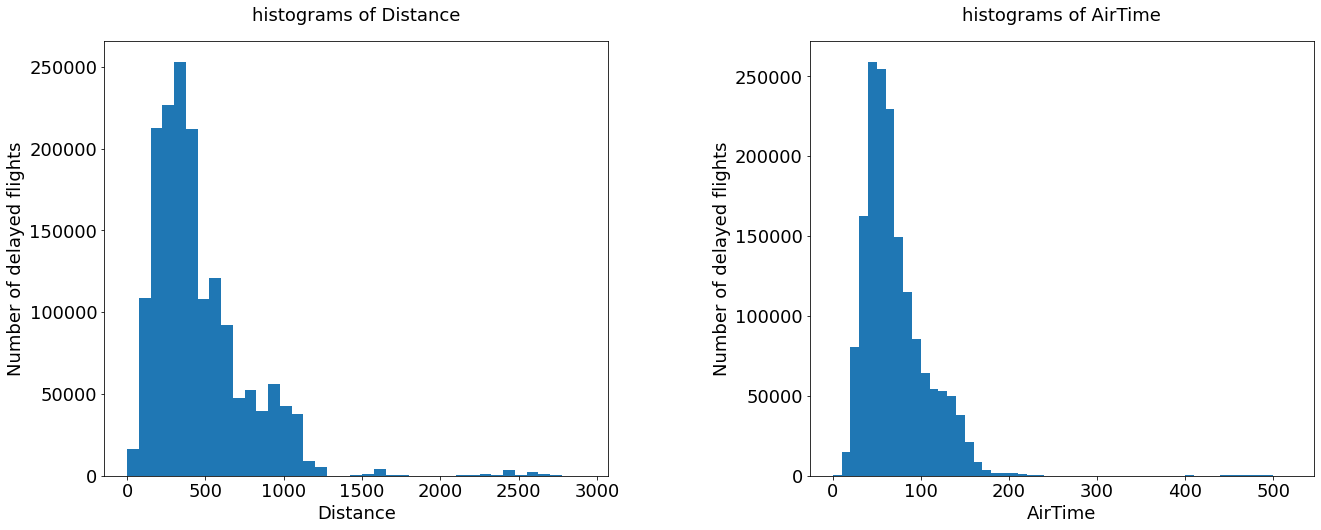

In [15]:
# Distance and AirTime histograms

plt.figure(figsize= (14, 8))

plt.subplot(1,2,1)
bins = np.arange(0,DataExpo_Delay['Distance'].max()+75,75)
plt.hist(data = DataExpo_Delay, x= 'Distance',bins = bins);
plt.title('histograms of Distance', fontsize=18, pad=20)
plt.xlabel('Distance', fontsize=18)
plt.ylabel('Number of delayed flights', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(1,2,2)
bins = np.arange(0,DataExpo_Delay['AirTime'].max()+10,10)
plt.hist(data = DataExpo_Delay, x= 'AirTime',bins = bins)
plt.title('histograms of AirTime', fontsize=18, pad=20)
plt.xlabel('AirTime', fontsize=18)
plt.ylabel('Number of delayed flights', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout
plt.subplots_adjust(left=0.1,right=1.3,  wspace=0.4, hspace=0.4);

The distribution of Distance and AirTime shows skewness toward the right.

The top 5 Origins that have the most delayed flights.

In [16]:
# The top 5 Origin that have the most delayed flights

Origin = DataExpo_Delay['Origin'].value_counts().nlargest(5).index.tolist()
Origin_top_5_late = DataExpo_Delay[DataExpo_Delay['Origin'].isin (Origin)]
Origin_top_5_late['Origin'].value_counts()


ATL    118084
DFW     62087
LAX     53669
ORD     53495
CLT     45354
Name: Origin, dtype: int64

The top 5 Destinations that have the most delayed flights.

In [17]:
# The top 5 Destinations that have the most delayed flights

Dest = DataExpo_Delay['Dest'].value_counts().nlargest(5).index.tolist()
Dest_top_5_late = DataExpo_Delay[DataExpo_Delay['Dest'].isin (Dest)]
Dest_top_5_late['Dest'].value_counts()

ATL    81528
LAX    48576
LAS    43322
DFW    42349
ORD    37954
Name: Dest, dtype: int64

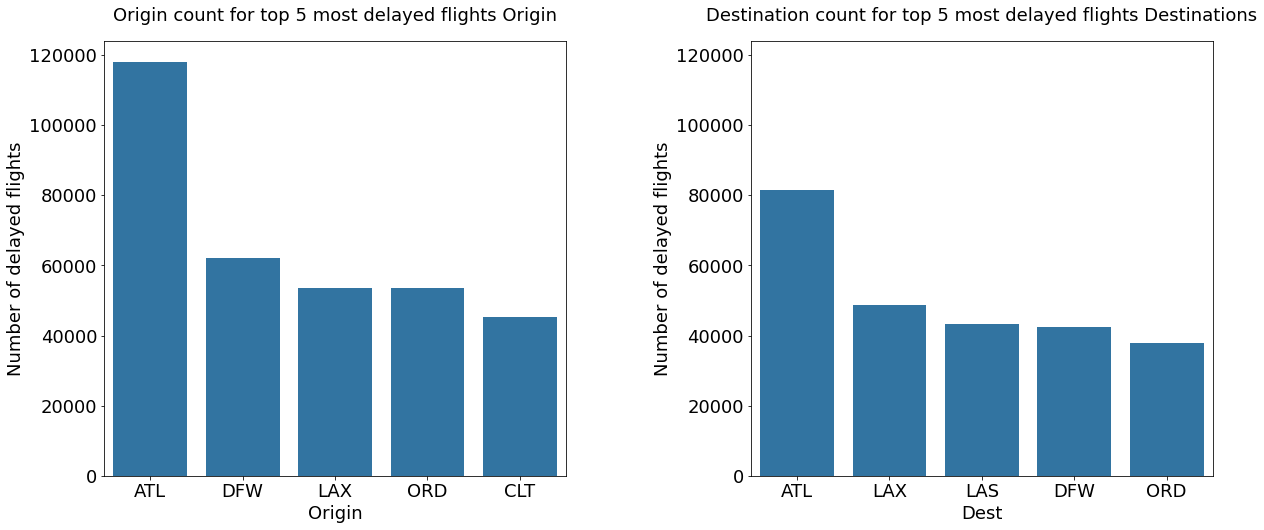

In [18]:
# Plots for top 5 destinations that have the most delayed flights
plt.figure(figsize=(14,8))

# Origin count
plt.subplot(1,2,1)
ax = sb.countplot(data=Origin_top_5_late, x='Origin', color =sb.color_palette()[0], order = Origin_top_5_late['Origin'].value_counts().index)
ax.axes.set_title("Origin count for top 5 most delayed flights Origin",fontsize=18, pad=20)
ax.set_ylabel("Number of delayed flights",fontsize=18);
ax.set_xlabel("Origin",fontsize=18);
ax.tick_params(labelsize=18)

# Destination count

plt.subplot(1,2,2)
ax1 = sb.countplot(data=Dest_top_5_late, x='Dest', color =sb.color_palette()[0], order = Dest_top_5_late['Dest'].value_counts().index)
plt.ylim(ax.get_ylim()) # set y-axis limits to be same as left plot
ax1.axes.set_title("Destination count for top 5 most delayed flights Destinations",fontsize=18, pad=20)
ax1.set_ylabel("Number of delayed flights",fontsize=18);
ax1.set_xlabel("Dest",fontsize=18);
ax1.tick_params(labelsize=18)

plt.subplots_adjust(left=0.1,right=1.2, wspace=0.4, hspace=0.4 );

ATL clearly has the most number of delayed flights as Destination or as Origin.

# bivariate exploratory analysis

### Q1 What are the most significant types of delays?

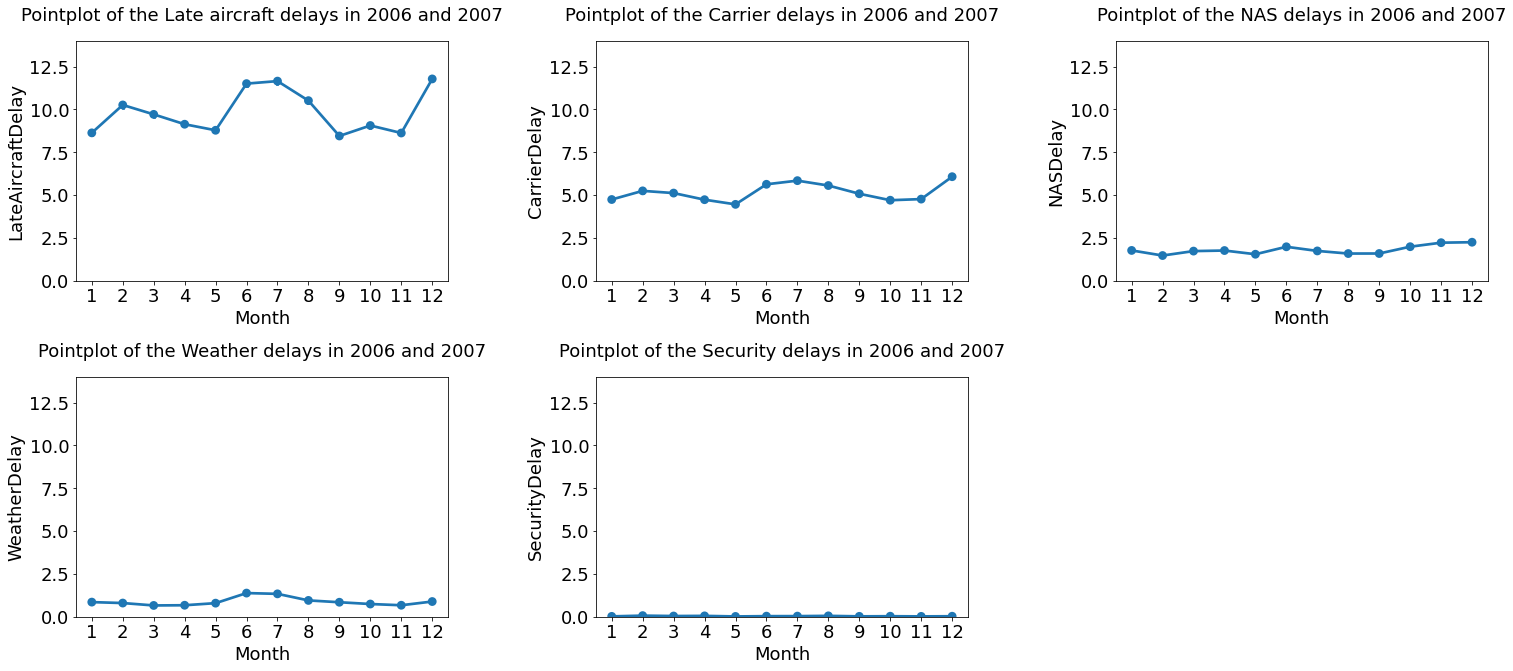

In [19]:
# Five types of delays in 2006 and 2007 Pointplot

plt.figure(figsize= (14, 8))

plt.subplot(2,3,1)
b1 = sb.pointplot(data=DataExpo_Delay, x='Month', y='LateAircraftDelay',dodge = 0.3)
plt.ylim(0,14)
b1.axes.set_title("Pointplot of the Late aircraft delays in 2006 and 2007",fontsize=18, pad=20)
b1.set_ylabel("LateAircraftDelay",fontsize=18);
b1.set_xlabel("Month",fontsize=18);
b1.tick_params(labelsize=18)

plt.subplot(2,3,2)
b2 = sb.pointplot(data=DataExpo_Delay, x='Month', y='CarrierDelay',dodge = 0.3)
plt.ylim(0,14)
b2.axes.set_title("Pointplot of the Carrier delays in 2006 and 2007",fontsize=18, pad=20)
b2.set_ylabel("CarrierDelay",fontsize=18);
b2.set_xlabel("Month",fontsize=18);
b2.tick_params(labelsize=18)

plt.subplot(2,3,3)
b3 = sb.pointplot(data=DataExpo_Delay, x='Month', y='NASDelay',dodge = 0.3)
plt.ylim(0,14)
b3.axes.set_title("Pointplot of the NAS delays in 2006 and 2007",fontsize=18, pad=20)
b3.set_ylabel("NASDelay",fontsize=18);
b3.set_xlabel("Month",fontsize=18);
b3.tick_params(labelsize=18)

plt.subplot(2,3,4)
b4 = sb.pointplot(data=DataExpo_Delay, x='Month', y='WeatherDelay',dodge = 0.3)
plt.ylim(0,14)
b4.axes.set_title("Pointplot of the Weather delays in 2006 and 2007",fontsize=18, pad=20)
b4.set_ylabel("WeatherDelay",fontsize=18);
b4.set_xlabel("Month",fontsize=18);
b4.tick_params(labelsize=18)

plt.subplot(2,3,5)
b5 = sb.pointplot(data=DataExpo_Delay, x='Month', y='SecurityDelay',dodge = 0.3)
plt.ylim(0,14)
plt.title('Pointplot of the Security delays in 2006 and 2007');
b5.axes.set_title("Pointplot of the Security delays in 2006 and 2007",fontsize=18, pad=20)
b5.set_ylabel("SecurityDelay",fontsize=18);
b5.set_xlabel("Month",fontsize=18);
b5.tick_params(labelsize=18);

plt.subplots_adjust(left=0.1,bottom=0.1, right=1.5, top=1.1, wspace=0.4, hspace=0.4);

From the plot, we can deduce that Late aircraft delay is the most significant cause for flight delays.

## Q2 Is there a relation between ArrDelay at certain Dest and DepDelay from certain Origin if the Dest and the Origin are the same?

In [20]:
# Top 5 Origin that have the most delayed flights ordered by the mean of DepDelay
Origin_top_5_late.groupby('Origin')['DepDelay'].mean()

Origin
ATL    23.479803
CLT    22.168541
DFW    25.576288
LAX    17.072742
ORD    33.952575
Name: DepDelay, dtype: float64

In [21]:
# Top 5 Destination that have the most delayed flights ordered by the mean of ArrDelay
Dest_top_5_late.groupby('Dest')['ArrDelay'].mean()

Dest
ATL    23.935090
DFW    23.484285
LAS    16.774756
LAX    17.061038
ORD    35.282526
Name: ArrDelay, dtype: float64

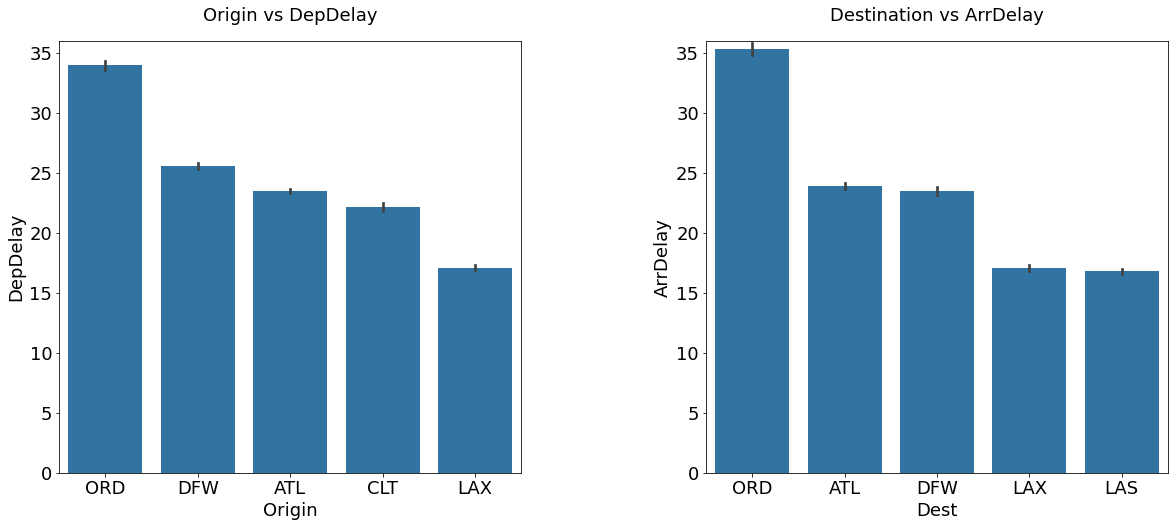

In [22]:
# Plots for Origin vs DepDelay and Destination vs ArrDelay for top 5 Origin and Destination that have the most delayed flights

plt.figure(figsize= (14, 8))

# Origin vs DepDelay 
plt.subplot(2,2,1)
g1 = sb.barplot(data=Origin_top_5_late, x='Origin', y = 'DepDelay', color =sb.color_palette()[0],order = Origin_top_5_late.groupby('Origin')['DepDelay'].mean().sort_values(ascending = False).index)
g1.axes.set_title("Origin vs DepDelay",fontsize=18, pad=20)
g1.set_ylabel("DepDelay",fontsize=18);
g1.set_xlabel("Origin",fontsize=18);
g1.tick_params(labelsize=18)

# Destination vs ArrDelay 
plt.subplot(2,2,2)
g2 = sb.barplot(data=Dest_top_5_late, x='Dest', y = 'ArrDelay', color =sb.color_palette()[0],order = Dest_top_5_late.groupby('Dest')['ArrDelay'].mean().sort_values(ascending = False).index)
plt.ylim(g1.get_ylim()) # set y-axis limits to be same as left plot
g2.axes.set_title("Destination vs ArrDelay",fontsize=18, pad=20)
g2.set_ylabel("ArrDelay",fontsize=18);
g2.set_xlabel("Dest",fontsize=18);
g2.tick_params(labelsize=18)
plt.subplots_adjust(left=0.1,right=1.2,top=1.9,bottom=0.1,  wspace=0.4, hspace=0.4);

The two plots above show a similar pattern in which each of ATL and LAX **has the same Time delay** (ArrDelay and DepDelay) as Destination and as Origin, And each of ORD and DFW **has approximately the same Time delay** (ArrDelay and DepDelay) as Destination and as Origin.

This lead to the conclusion that there is a strong relation between ArrDelay at certain Dest and DepDelay from certain Origin if the Dest and the Origin are the same.

# Multivariate exploratory analysis

### Q3 Does the Airtime and Distance affect the number of delayed flights?


Let's explore the most delayed aircrafts 

In [23]:
# Delayed aircrafts due to only Late Aircraft Delay with delayed flights more than 200

LateAircraftDelay_only= DataExpo_Delay.query('CarrierDelay ==0 & WeatherDelay ==0 & NASDelay ==0 & SecurityDelay ==0 &LateAircraftDelay !=0')
plane_list = LateAircraftDelay_only['TailNum'].value_counts().loc[lambda x:x>200].index.tolist()
aircrafts_morethan_200 = LateAircraftDelay_only[LateAircraftDelay_only['TailNum'].isin (plane_list)]
aircrafts_morethan_200['TailNum'].value_counts()

N455YV    252
N448YV    238
N445YV    230
N454YV    215
N75994    209
N434YV    208
N932AT    202
N447YV    201
Name: TailNum, dtype: int64

In [24]:
# Total delayed flights due to aircrafts with delayed flights more than 200
aircrafts_morethan_200.shape[0]

1755

In [25]:
# percentage of The most delayed aircrafts due to only Late Aircraft Delay made flights less than the mean airtime
100 * aircrafts_morethan_200.query('AirTime < 70.95805724195651').shape[0]/aircrafts_morethan_200.shape[0]

85.01424501424502

In [26]:
# percentage of The most delayed aircrafts due to only Late Aircraft Delay made flights less than the mean distance
100 * aircrafts_morethan_200.query('Distance < 459.5472694786602').shape[0]/aircrafts_morethan_200.shape[0]

91.62393162393163

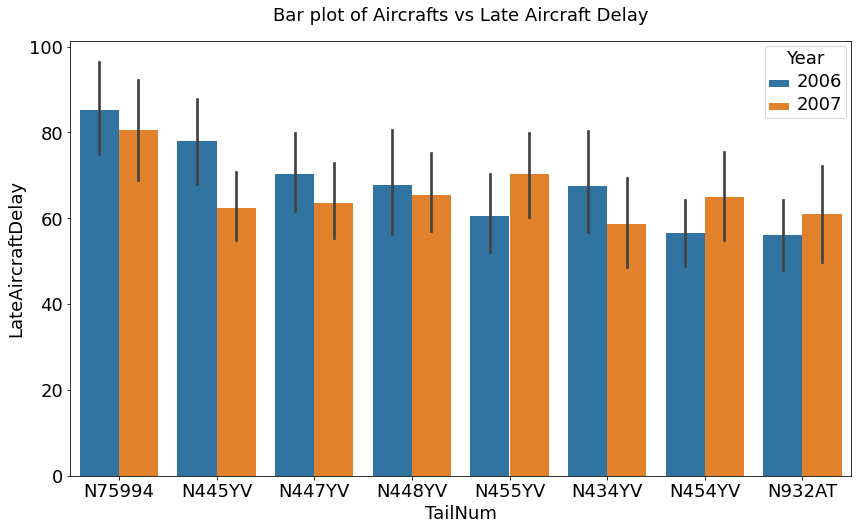

In [27]:
# Aircrafts vs Late Aircraft Delay bar plot ordered by late aircraft delay

plt.figure(figsize= (14, 8));

g2 = sb.barplot(data = aircrafts_morethan_200, x='TailNum',y = 'LateAircraftDelay',order = aircrafts_morethan_200.groupby('TailNum')['LateAircraftDelay'].mean().sort_values(ascending = False).index,hue = 'Year')
g2.axes.set_title("Bar plot of Aircrafts vs Late Aircraft Delay",fontsize=18, pad=20)
g2.set_ylabel("LateAircraftDelay",fontsize=18);
g2.set_xlabel("TailNum",fontsize=18);
g2.tick_params(labelsize=18)
plt.setp(g2.get_legend().get_texts(), fontsize='18')
plt.setp(g2.get_legend().get_title(), fontsize='18');

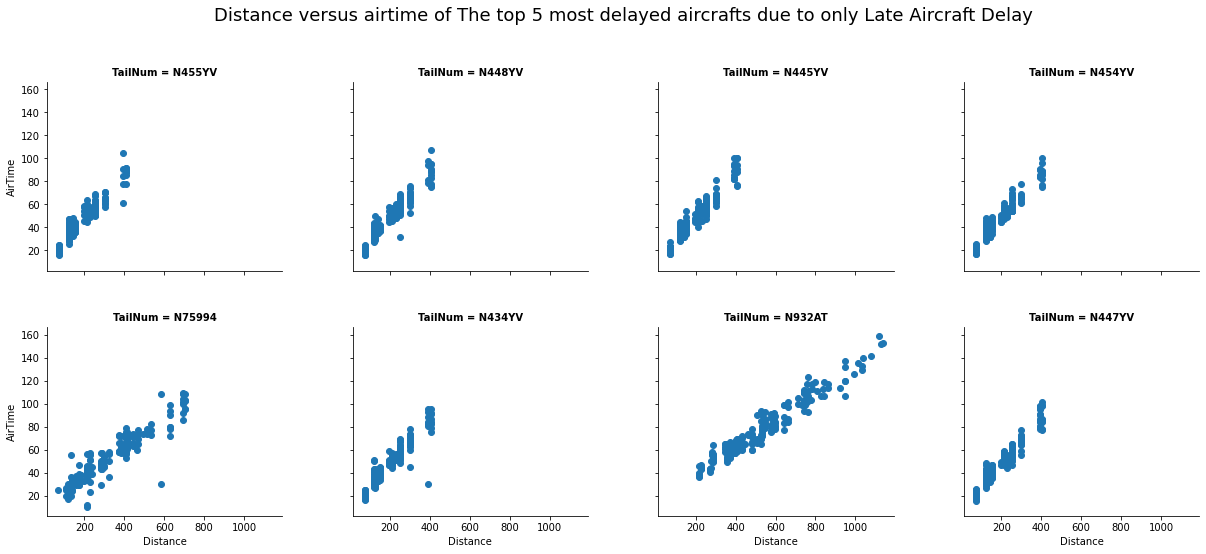

In [28]:
# Distance versus airtime of The most delayed aircrafts due to only Late Aircraft Delay ordered by number of delayed flights

h = sb.FacetGrid(data = aircrafts_morethan_200,  margin_titles = True, col = 'TailNum', col_order = aircrafts_morethan_200['TailNum'].value_counts().index,col_wrap = 4)
h.map(plt.scatter, 'Distance' ,  'AirTime')
h.fig.suptitle('Distance versus airtime of The top 5 most delayed aircrafts due to only Late Aircraft Delay', fontsize=18);
h.fig.set_size_inches(20, 8);
h.set_titles(col_template="TailNum = {col_name}", fontweight='bold')
h.fig.subplots_adjust(left=0.1,right=0.9,top=0.85,  wspace=0.3, hspace=0.3);

It is obvious from the plots that most of the delayed Aircrafts made short-distance short-timed flights.

91.62% of the most delayed aircrafts made flights less than the mean distance of the delayed flights.

85.01% of them made flights less than the mean airtime of the delayed flights.

Keep in mind that the total delayed flights due to aircrafts with delayed flights of more than 200 are only 1755 late flights.

In [29]:
# Mean of AirTime and mean of Distance for aircraft N75994 which is at the top of the mean of the Late Aircraft Delay

aircrafts_morethan_200.query('TailNum == "N75994"')['AirTime'].mean(), aircrafts_morethan_200.query('TailNum == "N75994"')['Distance'].mean()

(52.74162679425837, 321.66985645933016)

In [30]:
# Mean of AirTime and mean of Distance for aircraft N455YV which is at the top of the number of late flights

aircrafts_morethan_200.query('TailNum == "N455YV"')['AirTime'].mean(), aircrafts_morethan_200.query('TailNum == "N455YV"')['Distance'].mean()

(45.17460317460318, 181.63095238095238)

We can deduce from the bar plot and the scatter plot above that:

Aircraft N455YV **(the top of the number of late flights)** is the fifth according to the mean of Late Aircraft Delay

Aircraft N75994 **(the top of the mean of Late Aircraft Delay)** is the fifth according to the number of late flights.

Both of the two Aircraft made flights **less than** the mean of Airtime and **less than** the mean of Distance of the delayed flights.

Aircraft N75994 has a mean value of Airtime equals 52.74 and a mean value of Distance equals 321.67.

Aircraft N455YV has a mean value of Airtime equals 45.17 and a mean value of Distance equals 181.63.

So we can conclude that long-distance flights and long-time flights have no significant impact on the delays.

* Q4 Is there a sign that the Cancelled flights are related to the Aircraft itself?

In [31]:
# Top 5 aircrafts with Cancelled flight 

DataExpo_cancelled = DataExpo_cancelled_or_diverted.query('Cancelled == 1 & Diverted == 0& TailNum!="0" &TailNum !="000000"')

DataExpo_cancelled_list = DataExpo_cancelled['TailNum'].value_counts().nlargest(5).index.tolist()
DataExpo_top_5_cancelled = DataExpo_cancelled[DataExpo_cancelled['TailNum'].isin (DataExpo_cancelled_list)]

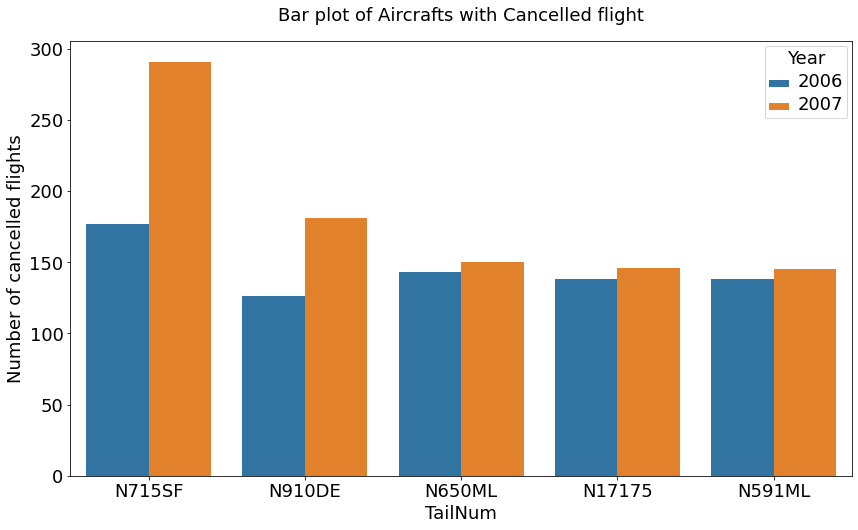

In [32]:
# Aircrafts with Cancelled flight counts

plt.figure(figsize= (14, 8))

g3 = sb.countplot(data = DataExpo_top_5_cancelled, x='TailNum', hue = 'Year', order = DataExpo_top_5_cancelled['TailNum'].value_counts().index)
g3.axes.set_title("Bar plot of Aircrafts with Cancelled flight",fontsize=18, pad=20)
g3.set_ylabel("Number of cancelled flights",fontsize=18);
g3.set_xlabel("TailNum",fontsize=18);
g3.tick_params(labelsize=18)
plt.setp(g3.get_legend().get_texts(), fontsize='18')
plt.setp(g3.get_legend().get_title(), fontsize='18');

It is clear that the top 2 Aircrafts show a huge increase in cancelled flights in 2007 versus 2006.

In [33]:
# Number of delayed flights and mean of Late Aircraft Delay for aircraft N715SF which is at the top of cancelled flights
LateAircraftDelay_only.query('TailNum == "N715SF"').shape[0],LateAircraftDelay_only.query('TailNum == "N715SF"')['LateAircraftDelay'].mean()

(180, 84.91111111111111)

In [34]:
# Number of delayed flights and mean of Late Aircraft Delay for aircraft N455YV which is at the top of the number of late flights
LateAircraftDelay_only.query('TailNum == "N455YV"').shape[0],LateAircraftDelay_only.query('TailNum == "N455YV"')['LateAircraftDelay'].mean()

(252, 65.38888888888889)

In [35]:
# Number of delayed flights and mean of Late Aircraft Delay for aircraft N75994 which is at the top of the mean of the Late Aircraft Delay
LateAircraftDelay_only.query('TailNum == "N75994"').shape[0],LateAircraftDelay_only.query('TailNum == "N75994"')['LateAircraftDelay'].mean()

(209, 83.33014354066985)

Aircraft N715SF **(the top of cancelled flights)** has 180 delayed flights with a mean of Late Aircraft Delay equals 84.91.

Aircraft N455YV **(the top of the number of late flights)** has 252 delayed flights and 65.39 is the value of the mean of Late Aircraft Delay.

Aircraft N75994 **(the top of the Late Aircraft Delay mean)** has 209 delayed flights and 83.33 is the value of the mean of Late Aircraft Delay.

This means that the Aircraft with the most cancelled flights has a mean of Late Aircraft Delay higher than that of the highest mean of Late Aircraft Delay from the list of the highest delayed flights.

Keep in mind that the Aircraft N715SF made fewer Number of delayed flights 180 flight verses 209 flight by N75994.

Since we reached the point that the aircraft which is at the top of cancelled flights has other flights delayed with a significant average delay, This lead us to affirm that the Aircraft itself has an impact on cancelled flights.

# Limitations

* The absence of determining the reason for cancelling the flights.
* The existence of a column containing CRS of the Airtime could have given a boost in determining the overall delay of the flights.
* There is a huge number of different aircrafts, so the data about each aircraft is really small.

###  So to conclude:

* Late aircraft delay is the most significant cause of flight delays.
* There is a strong relation between ArrDelay at certain Dest and DepDelay from certain Origin if the Destination and the Origin are the same.
* Long-distance flights and long-time flights have no significant impact on the delays.
* The Aircraft itself has an impact on the cancelled flights.